<h4 style="text-align:right">The Course of Computational Physics,&nbsp; Peking University</h4>
***
<p><br>
<h1 style="text-align:center"><font face="宋体" size=6>计算物理学第六次作业</font></h1>
<br></p>
<h2 style="text-align:center"><font face="楷体">姓名:&nbsp;贺鑫</font> </h2>
<h2 style="text-align:center"> <font face="楷体">学号:&nbsp; _1500011805_</font></h2>

## 1 一维随机行走
> 本程序模拟一维随机行走现象

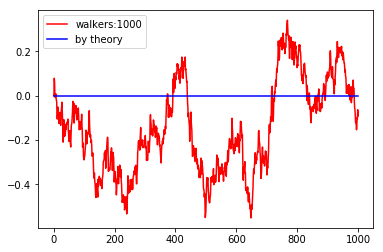

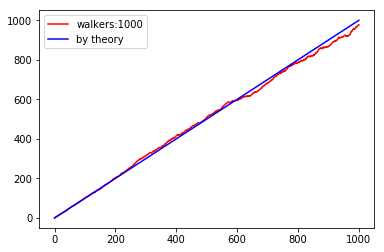

In [8]:
####        the first example give the R_probability=0.5

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

nwalker=1000
nstep=1000
R_prob=0.5   # the probability of moving on right
l=1

walkers=np.zeros(nwalker) # all walkers initialized at zero position.

nlist=np.linspace(0,nstep,nstep+1)
walker_mean=np.zeros(nstep+1)
walker_sigma=np.zeros(nstep+1)

for i in range(1,nstep+1):
    for j in range(nwalker):
        if(np.random.random()<R_prob):
            walkers[j]+=l; # move right
        else:
            walkers[j]-=l; # move left
    walker_mean[i]=walkers.mean()
    walker_sigma[i]=walkers.std()**2

plt.plot(nlist,walker_mean,'r-',label='walkers:%d'%nwalker)
plt.plot(nlist,(2*R_prob-1)*nlist,'b-',label='by theory')
plt.legend()
plt.savefig("Random_Walk_Mean_w%d_R%.1f.png"%(nwalker,R_prob))
plt.show()

plt.plot(nlist,walker_sigma,'r-',label='walkers:%d'%nwalker)
plt.plot(nlist,4*R_prob*(1-R_prob)*nlist,'b-',label='by theory')
plt.legend()
plt.savefig("Random_Walk_Sigma_w%d_R%.1f.png"%(nwalker,R_prob))
plt.show()

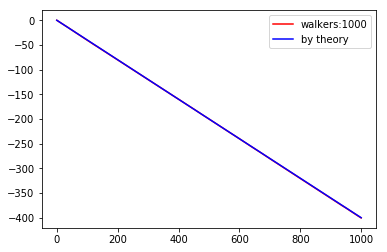

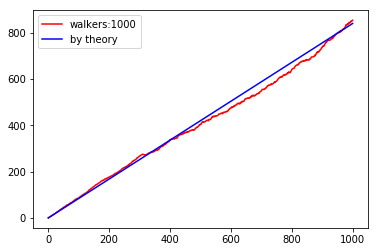

In [5]:
####        the first example give the R_probability=0.3

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

nwalker=1000
nstep=1000
R_prob=0.3   # the probability of moving on right
l=1

walkers=np.zeros(nwalker) # all walkers initialized at zero position.

nlist=np.linspace(0,nstep,nstep+1)
walker_mean=np.zeros(nstep+1)
walker_sigma=np.zeros(nstep+1)

for i in range(1,nstep+1):
    for j in range(nwalker):
        if(np.random.random()<R_prob):
            walkers[j]+=l; # move right
        else:
            walkers[j]-=l; # move left
    walker_mean[i]=walkers.mean()
    walker_sigma[i]=walkers.std()**2

plt.plot(nlist,walker_mean,'r-',label='walkers:%d'%nwalker)
plt.plot(nlist,(2*R_prob-1)*nlist,'b-',label='by theory')
plt.legend()
plt.savefig("Random_Walk_Mean_w%d_R%.1f.png"%(nwalker,R_prob))
plt.show()

plt.plot(nlist,walker_sigma,'r-',label='walkers:%d'%nwalker)
plt.plot(nlist,4*R_prob*(1-R_prob)*nlist,'b-',label='by theory')
plt.legend()
plt.savefig("Random_Walk_Sigma_w%d_R%.1f.png"%(nwalker,R_prob))
plt.show()

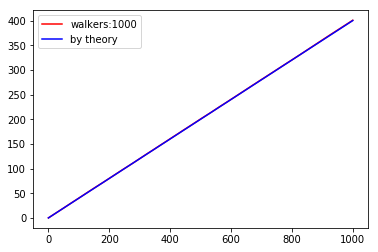

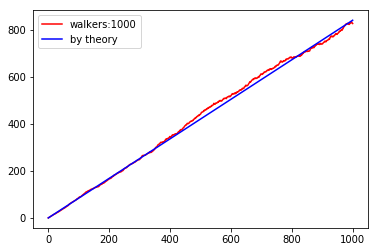

In [4]:
####        the first example give the R_probability=0.7

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

nwalker=1000
nstep=1000
R_prob=0.7   # the probability of moving on right
l=1

walkers=np.zeros(nwalker) # all walkers initialized at zero position.

nlist=np.linspace(0,nstep,nstep+1)
walker_mean=np.zeros(nstep+1)
walker_sigma=np.zeros(nstep+1)

for i in range(1,nstep+1):
    for j in range(nwalker):
        if(np.random.random()<R_prob):
            walkers[j]+=l; # move right
        else:
            walkers[j]-=l; # move left
    walker_mean[i]=walkers.mean()
    walker_sigma[i]=walkers.std()**2

plt.plot(nlist,walker_mean,'r-',label='walkers:%d'%nwalker)
plt.plot(nlist,(2*R_prob-1)*nlist,'b-',label='by theory')
plt.legend()
plt.savefig("Random_Walk_Mean_w%d_R%.1f.png"%(nwalker,R_prob))
plt.show()

plt.plot(nlist,walker_sigma,'r-',label='walkers:%d'%nwalker)
plt.plot(nlist,4*R_prob*(1-R_prob)*nlist,'b-',label='by theory')
plt.legend()
plt.savefig("Random_Walk_Sigma_w%d_R%.1f.png"%(nwalker,R_prob))
plt.show()

> 说明  
可以发现（这里程序中默认选取的l=1）:  
$$\langle x \rangle=(R-L)ln$$ 
而$\langle x^2 \rangle=\langle (\sum_i^n \Delta x_i)(\sum_i^n \Delta x_i) \rangle = \langle \sum_i^n \Delta x_i^2 + \sum_{i\ne j}^n \Delta x_i\Delta x_j\rangle = 
\sum_i^n \langle \Delta x_i^2 \rangle + \sum_{i\ne j}^n \langle \Delta x_i \rangle \langle \Delta x_j\rangle =
l^2 n + (n^2-n)(R-L)^2l^2$  
所以(注意到 $R+L=1$ )：
$$\begin{eqnarray}
\langle x^2 \rangle - \langle x \rangle^2 &=& l^2 n + (n^2-n)(R-L)^2l^2 - (R-L)^2l^2n^2 \\
&=& (1-(R-L)^2)l^2n = 4RLl^2n
\end{eqnarray}$$
  
> 这与$R=0.3$或$R=0.7$时的模拟，得到的sigma对n的斜率，大致为0.84相吻合！

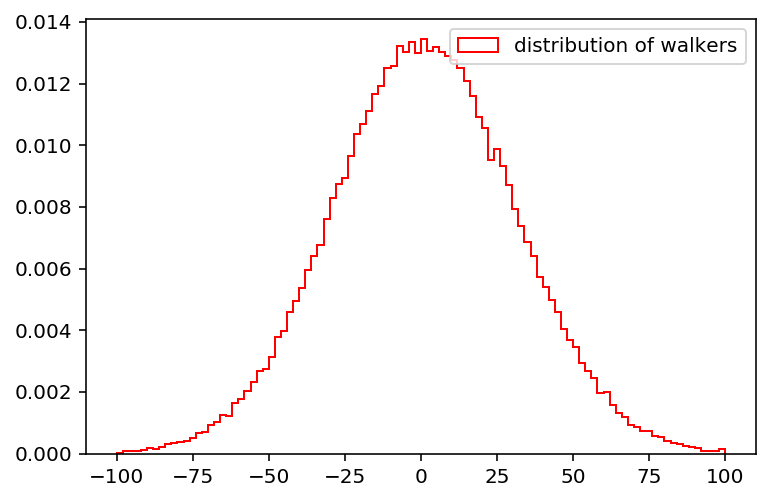

In [10]:
####        the plot the distribution of walkers

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numba import jit
%matplotlib inline

nwalker=100000 # recommend value
nstep=900
nfram=90
R_prob=0.5   # the probability of moving on right
l=1

walkers=np.zeros(nwalker) # all walkers initialized at zero position.
dists=np.zeros((101,nstep+1))
dists[50,0]=nwalker

@jit(nopython=True)
def walks(walkers,dists,nwalker,nstep,nfram,R_prob,l):
    for i in range(1,nstep+1):
        for j in range(nwalker):
            if(np.random.random_sample()<R_prob):
                walkers[j]+=l; # move right
            else:
                walkers[j]-=l; # move left
            if(walkers[j]>=-100 and walkers[j] <=100):
                dists[int(walkers[j]+100)//2,i]+=1;
    return walkers,dists/nwalker

walkers,dists = walks(walkers,dists,nwalker,nstep,nfram,R_prob,l)
#walkers,save_walkers=walks(walkers,save_walkers,nwalker,nstep,nfram,R_prob,l)
plt.hist(walkers,bins=100,range=(-100,100),density=True,histtype='step',color='r',label='distribution of walkers')
plt.legend()
plt.savefig('Random_Walk_distribution.png')
plt.show()

a=pd.DataFrame(dists.T)
a.to_csv('RW_dist.dat',header=None)
# the distribution data saved! (we only save even points value, 
# for odd point approximate to its adjoint even point)

<IPython.core.display.Javascript object>


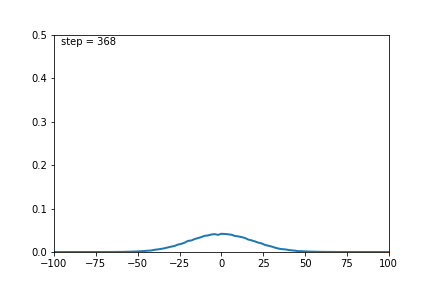

In [18]:
######### the distribution evolution against time  (.gif)

%matplotlib notebook
%config InlineBackend.figure_format = 'retina'

from numba import jit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation

a=pd.read_csv("RW_dist.dat",header=None)
data=a.values[:,1:]
xs=np.linspace(-100,100,101) # only statistic at even point
pstep=len(data[:,2])

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(-100, 100), ylim=(0, 0.5))
line, = ax.plot([], [], lw=2)
time_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

# animation function.  This is called sequentially
def animate(i):
    line.set_data(xs, data[i,:])
    time_text.set_text('step = %d'%i)
    return line, time_text

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=700, interval=10, blit=True)
plt.show()

> 可见，walkers的位置是服从正态分布的！